# Assignment 4

In [ ]:
Q1. Write a python program to apply Decision Tree Classifier algorithm on the following
datasets using Scikit-learn.

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


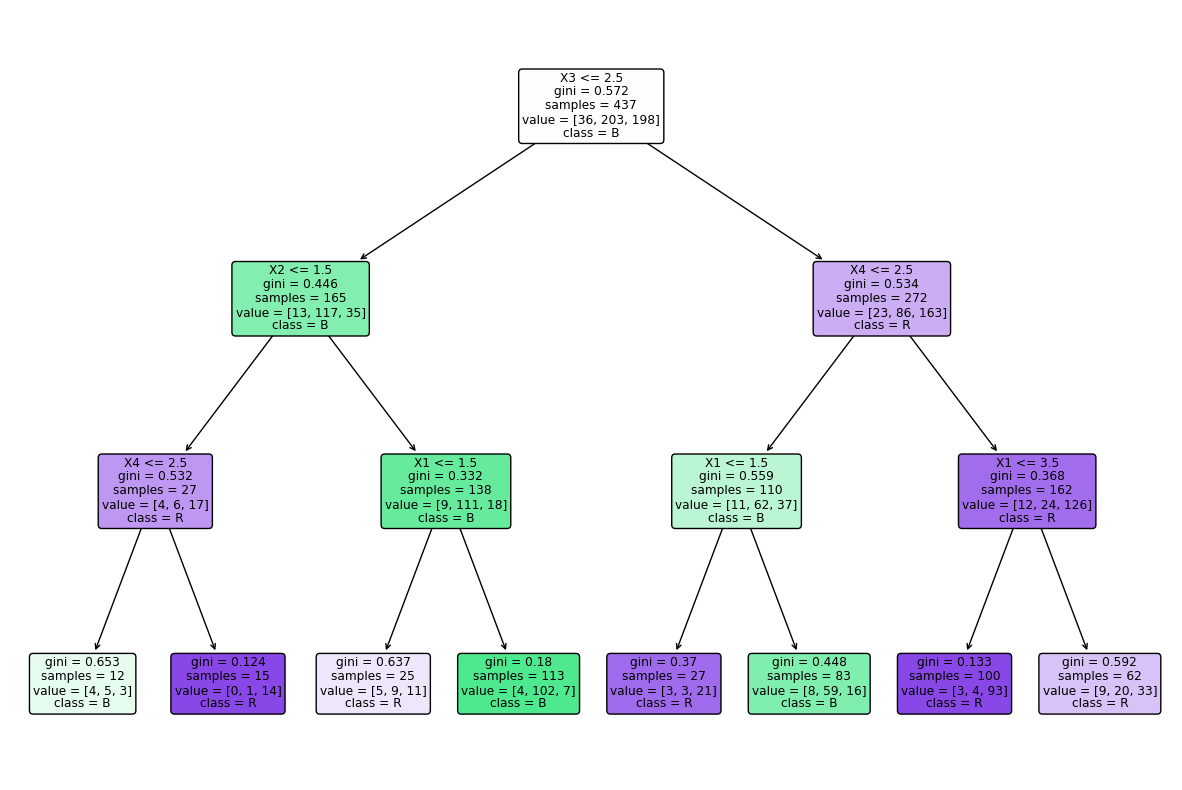

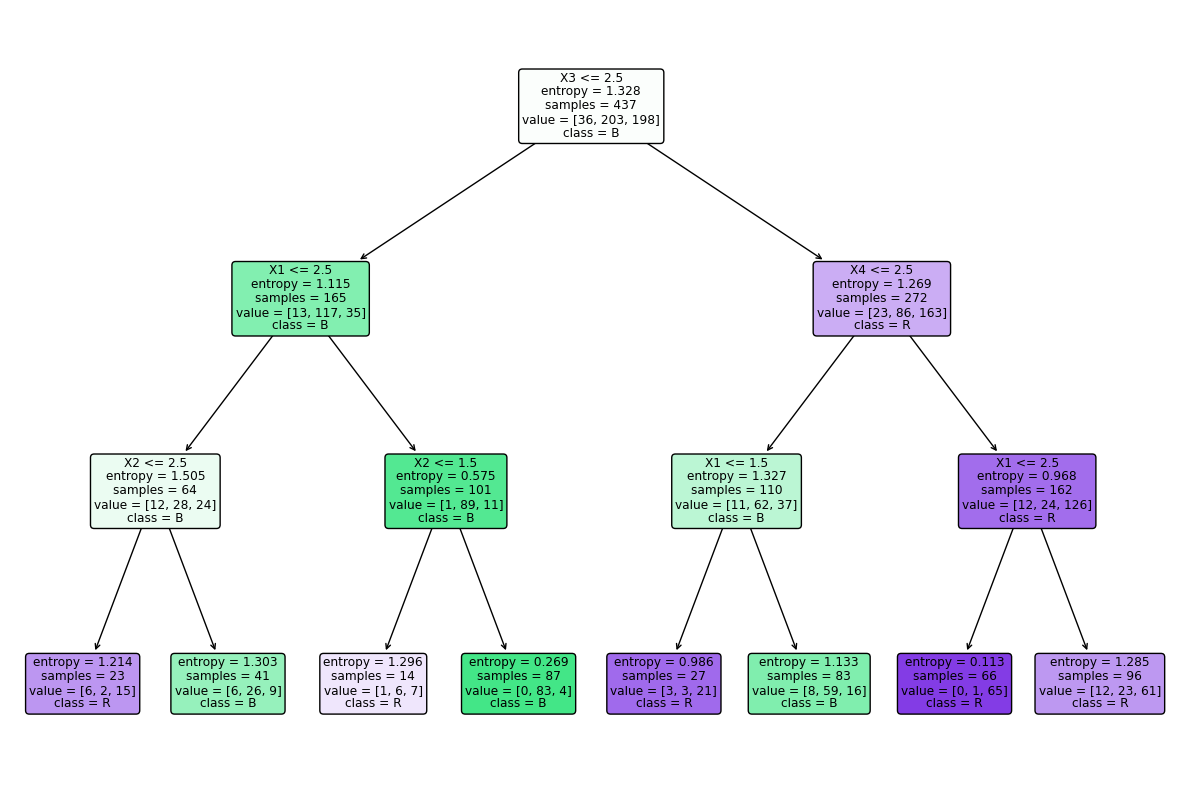

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree  # Add this import statement


# In[39]:


def importdata():
    balance_data = pd.read_csv('balance.csv', sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data


# In[40]:


def splitdataset(balance_data):
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test


# In[41]:


def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    clf_gini.fit(X_train, y_train)
    return clf_gini


# In[42]:


def train_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# In[43]:


def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


# In[44]:


def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


# In[45]:

# Fix typo in '__name__'
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])


In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Dataset Length:  11162
Dataset Shape:  (11162, 17)
Dataset:     age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


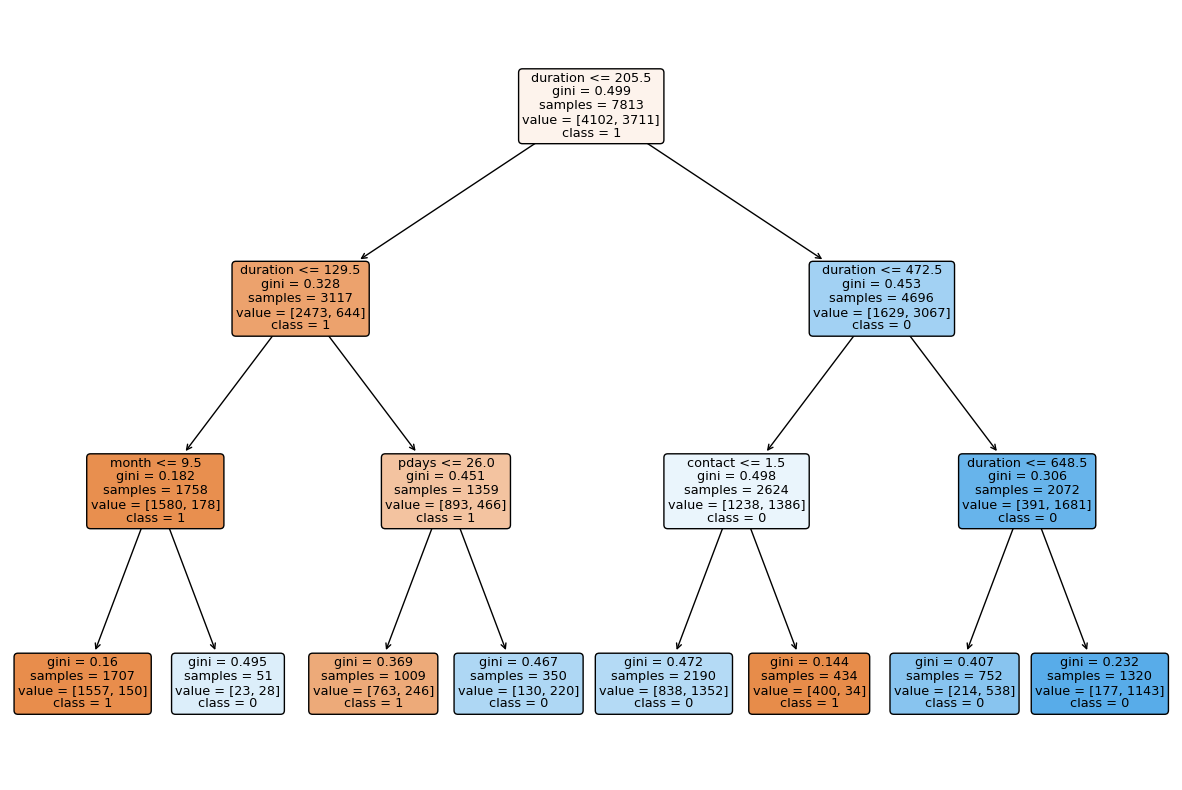

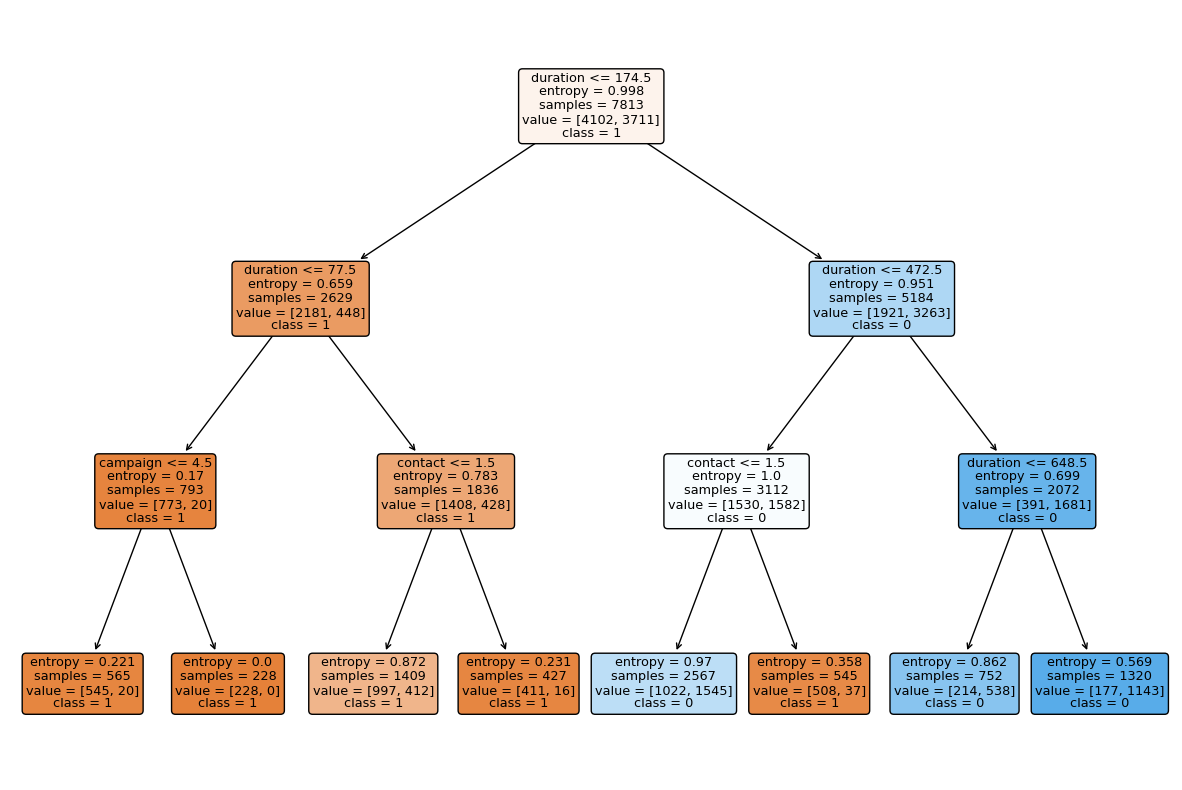

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset
def importdata():
    balance_data = pd.read_csv('bank.csv', sep=',', header=0)
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    return balance_data

# Encode categorical variables
def encode_data(balance_data):
    le = LabelEncoder()
    balance_data_encoded = balance_data.copy()
    for column in balance_data_encoded.columns:
        if balance_data_encoded[column].dtype == 'object':
            balance_data_encoded[column] = le.fit_transform(balance_data_encoded[column])
    return balance_data_encoded

# Split dataset into features and target variable
def splitdataset(balance_data):
    X = balance_data.iloc[:, 1:-1]  # Features
    Y = balance_data.iloc[:, -1]     # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Train using Gini index
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Train using Entropy
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
    print("Report : ", classification_report(y_test, y_pred))

# Plot decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

if __name__ == "__main__":
    data = importdata()
    data_encoded = encode_data(data)
    X_train, X_test, y_train, y_test = splitdataset(data_encoded)

    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)

    # Convert unique class values to strings
    class_names = list(map(str, data_encoded['deposit'].unique()))

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, list(X_train.columns), class_names)
    plot_decision_tree(clf_entropy, list(X_train.columns), class_names)


Dataset Length:  1728
Dataset Shape:  (1728, 7)
Dataset:    buying  maint doors persons  lug_boot safety Class Values
0  vhigh  vhigh     2       2         0    low        unacc
1  vhigh  vhigh     2       2         0    med        unacc
2  vhigh  vhigh     2       2         0   high        unacc
3  vhigh  vhigh     2       2         1    low        unacc
4  vhigh  vhigh     2       2         1    med        unacc


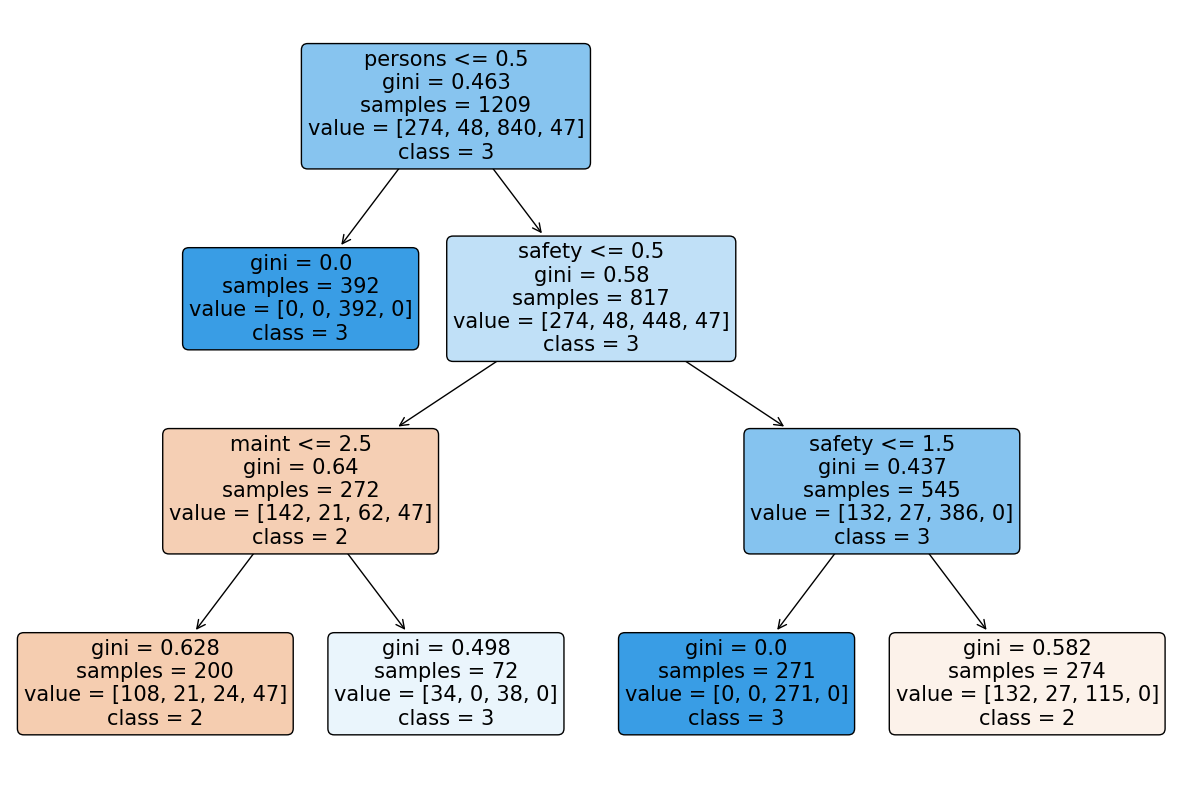

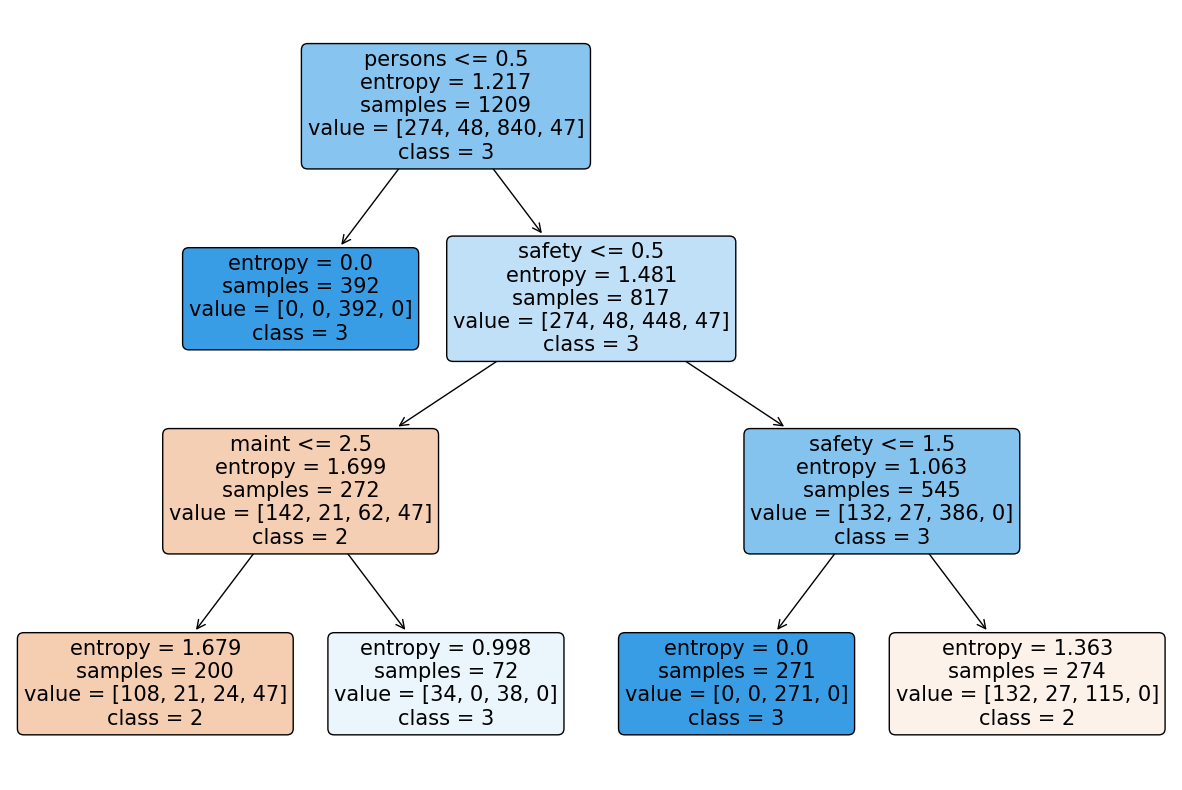

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset
def importdata():
    balance_data = pd.read_csv('qwer.csv')
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    return balance_data

# Encode categorical variables
def encode_data(balance_data):
    le = LabelEncoder()
    balance_data_encoded = balance_data.copy()
    for column in balance_data_encoded.columns:
        if balance_data_encoded[column].dtype == 'object':
            balance_data_encoded[column] = le.fit_transform(balance_data_encoded[column])
    return balance_data_encoded

# Split dataset into features and target variable
def splitdataset(balance_data):
    X = balance_data.iloc[:, :-1]  # Features
    Y = balance_data.iloc[:, -1]    # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Train using Gini index
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Train using Entropy
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
    print("Report : ", classification_report(y_test, y_pred))

# Plot decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

if __name__ == "__main__":
    data = importdata()
    data_encoded = encode_data(data)
    X_train, X_test, y_train, y_test = splitdataset(data_encoded)

    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)

    # Convert unique class values to strings
    class_names = list(map(str, data_encoded['Class Values'].unique()))

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, list(X_train.columns), class_names)
    plot_decision_tree(clf_entropy, list(X_train.columns), class_names)


In [ ]:
# Import necessary libraries
# For bank.csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your custom dataset from CSV
file_path = "./bank.csv"
df = pd.read_csv(file_path)


# Assume the target variable is in a column named 'target'
X = df.drop('balance', axis=1)
y = df['balance']
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Use one-hot encoding to convert categorical variables into numerical format
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")